In [6]:
import pandas as pd
import numpy as np

In [7]:
# Load and prepare data_last_3_years
data = pd.read_csv('PJME_hourly.csv')

In [8]:
# Convert 'Datetime' to datetime object
data['Datetime'] = pd.to_datetime(data['Datetime'])


In [9]:
# Keep only the last 3 years of data
latest_date = data['Datetime'].max()
cutoff_date = latest_date - pd.DateOffset(years=3)
data_last_3_years = data[data['Datetime'] >= cutoff_date].reset_index(drop=True)

In [10]:
# Extract useful datetime features
data_last_3_years['hour'] = data_last_3_years['Datetime'].dt.hour
data_last_3_years['day'] = data_last_3_years['Datetime'].dt.day
data_last_3_years['weekday'] = data_last_3_years['Datetime'].dt.weekday
data_last_3_years['month'] = data_last_3_years['Datetime'].dt.month
data_last_3_years['year'] = data_last_3_years['Datetime'].dt.year

In [11]:
# Normalize missing values if any
data_last_3_years['PJME_MW'] = pd.to_numeric(data_last_3_years['PJME_MW'], errors='coerce')
data_last_3_years = data_last_3_years.dropna()

In [12]:
# Define time window and create sequences
time_window = 30
x = []
y = []

for i in range(len(data_last_3_years) - time_window):
    window = data_last_3_years.iloc[i:i + time_window]
    
    # Use numeric features including datetime parts
    features = window[['PJME_MW', 'hour', 'day', 'weekday', 'month', 'year']].values
    x.append(features.flatten())  # Flatten 30 x 6 into 1D array
    y.append(data_last_3_years.iloc[i + time_window]['PJME_MW'])  # target value


In [13]:
# Convert to NumPy arrays
X = np.array(x)
Y = np.array(y)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
predictions = model.predict(X_test)

In [17]:
import matplotlib.pyplot as plt

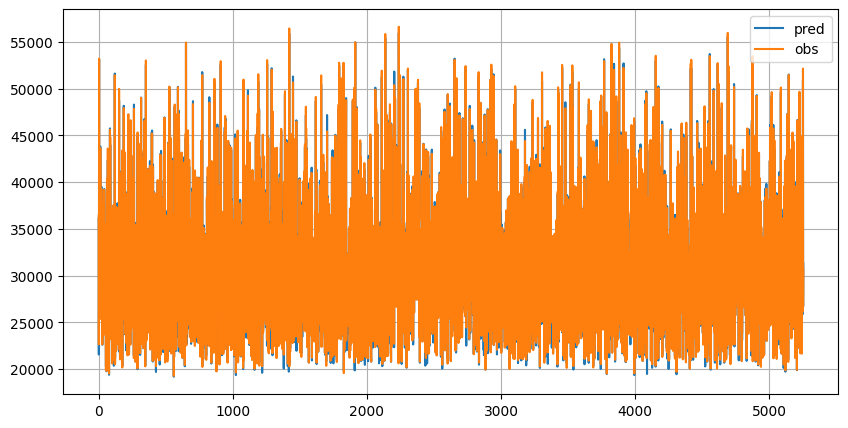

In [18]:
plt.figure(figsize=(10,5))
plt.plot(predictions, label='pred')
plt.plot(y_test, label='obs')
plt.grid()
plt.legend()
plt.show()

In [19]:
model.score(X_test, y_test)

0.9885107812929713

how it works

In [ ]:
example = [i for i in range(50)]

In [6]:
time_win = 4
X = []
y = []
for i in range(0, len(example)-time_win):
    X.append(example[i: i+time_win])
    y.append(example[i+time_win])

In [9]:
for i in range(len(X)):
    print(f"{X[i]}) -> {y[i]}")

[0, 1, 2, 3]) -> 4
[1, 2, 3, 4]) -> 5
[2, 3, 4, 5]) -> 6
[3, 4, 5, 6]) -> 7
[4, 5, 6, 7]) -> 8
[5, 6, 7, 8]) -> 9
[6, 7, 8, 9]) -> 10
[7, 8, 9, 10]) -> 11
[8, 9, 10, 11]) -> 12
[9, 10, 11, 12]) -> 13
[10, 11, 12, 13]) -> 14
[11, 12, 13, 14]) -> 15
[12, 13, 14, 15]) -> 16
[13, 14, 15, 16]) -> 17
[14, 15, 16, 17]) -> 18
[15, 16, 17, 18]) -> 19
[16, 17, 18, 19]) -> 20
[17, 18, 19, 20]) -> 21
[18, 19, 20, 21]) -> 22
[19, 20, 21, 22]) -> 23
[20, 21, 22, 23]) -> 24
[21, 22, 23, 24]) -> 25
[22, 23, 24, 25]) -> 26
[23, 24, 25, 26]) -> 27
[24, 25, 26, 27]) -> 28
[25, 26, 27, 28]) -> 29
[26, 27, 28, 29]) -> 30
[27, 28, 29, 30]) -> 31
[28, 29, 30, 31]) -> 32
[29, 30, 31, 32]) -> 33
[30, 31, 32, 33]) -> 34
[31, 32, 33, 34]) -> 35
[32, 33, 34, 35]) -> 36
[33, 34, 35, 36]) -> 37
[34, 35, 36, 37]) -> 38
[35, 36, 37, 38]) -> 39
[36, 37, 38, 39]) -> 40
[37, 38, 39, 40]) -> 41
[38, 39, 40, 41]) -> 42
[39, 40, 41, 42]) -> 43
[40, 41, 42, 43]) -> 44
[41, 42, 43, 44]) -> 45
[42, 43, 44, 45]) -> 46
[43, 44,

Predicting future

In [10]:
time_win = 4
future=3
X = []
y = []
for i in range(0, len(example)-time_win-future):
    X.append(example[i: i+time_win])
    y.append(example[i+time_win+future])

In [11]:
for i in range(len(X)):
    print(f"{X[i]}) -> {y[i]}")

[0, 1, 2, 3]) -> 7
[1, 2, 3, 4]) -> 8
[2, 3, 4, 5]) -> 9
[3, 4, 5, 6]) -> 10
[4, 5, 6, 7]) -> 11
[5, 6, 7, 8]) -> 12
[6, 7, 8, 9]) -> 13
[7, 8, 9, 10]) -> 14
[8, 9, 10, 11]) -> 15
[9, 10, 11, 12]) -> 16
[10, 11, 12, 13]) -> 17
[11, 12, 13, 14]) -> 18
[12, 13, 14, 15]) -> 19
[13, 14, 15, 16]) -> 20
[14, 15, 16, 17]) -> 21
[15, 16, 17, 18]) -> 22
[16, 17, 18, 19]) -> 23
[17, 18, 19, 20]) -> 24
[18, 19, 20, 21]) -> 25
[19, 20, 21, 22]) -> 26
[20, 21, 22, 23]) -> 27
[21, 22, 23, 24]) -> 28
[22, 23, 24, 25]) -> 29
[23, 24, 25, 26]) -> 30
[24, 25, 26, 27]) -> 31
[25, 26, 27, 28]) -> 32
[26, 27, 28, 29]) -> 33
[27, 28, 29, 30]) -> 34
[28, 29, 30, 31]) -> 35
[29, 30, 31, 32]) -> 36
[30, 31, 32, 33]) -> 37
[31, 32, 33, 34]) -> 38
[32, 33, 34, 35]) -> 39
[33, 34, 35, 36]) -> 40
[34, 35, 36, 37]) -> 41
[35, 36, 37, 38]) -> 42
[36, 37, 38, 39]) -> 43
[37, 38, 39, 40]) -> 44
[38, 39, 40, 41]) -> 45
[39, 40, 41, 42]) -> 46
[40, 41, 42, 43]) -> 47
[41, 42, 43, 44]) -> 48
[42, 43, 44, 45]) -> 49
